Hikyuu 交互式工具示例
==============

1、引入交互式工具
-----------------
需从hikyuu.interactive.interactive引入，而不是直接从hikyuu库中引入（hikyuu是一个库，可用于编制其他的工具，而hikyuu.interactive.interactive是基于hikyuu库实现的交互式探索工具）

In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *

Wall time: 15.9 s


2、创建交易系统并运行
--------------------

In [2]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(initCash = 300000)

#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA最为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(OP(EMA(n=5)), slow_n=10)

#固定每次买入1000股
my_mm = MM_FixedCount(1000)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm['sz000001'], Query(-150))

3、绘制曲线观察
---------------

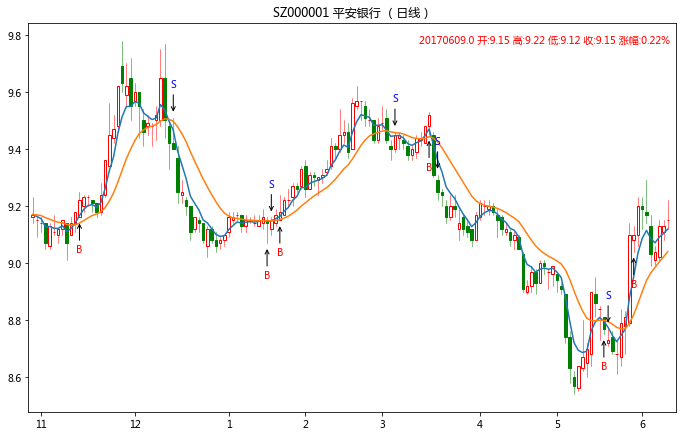

In [3]:
#绘制系统信号
sys.plot()

k = sm['sz000001'].getKData(Query(-150))
c = CLOSE(k)
fast = EMA(c, 5)
slow = EMA(fast, 10)

#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)

4、绘制资金收益曲线
---------------------

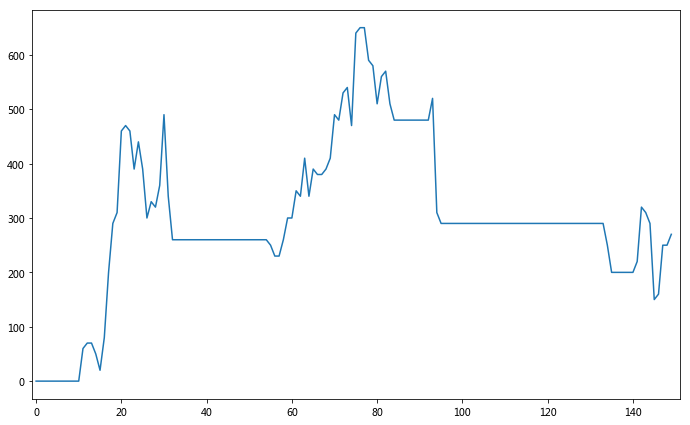

In [4]:
#绘制资金收益曲线
x = my_tm.getProfitCurve(k.getDatetimeList(), KQuery.DAY)
x = PRICELIST(x)
x.plot()

5、回测统计报告
----------------------

In [5]:
#回测统计
per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))

帐户初始金额: 300000.00
累计投入本金: 300000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 291120.00
未平仓头寸净值: 9150.00
当前总资产: 300270.00
已平仓交易总成本: 0.00
已平仓净利润总额: 200.00
单笔交易最大占用现金比例%: 3.15
交易平均占用现金比例%: 3.04
已平仓帐户收益率%: 0.07
帐户年复合收益率%: 0.16
帐户平均年收益率%: 0.16
赢利交易赢利总额: 510.00
亏损交易亏损总额: -310.00
已平仓交易总数: 5.00
赢利交易数: 2.00
亏损交易数: 3.00
赢利交易比例%: 40.00
赢利期望值: 40.00
赢利交易平均赢利: 255.00
亏损交易平均亏损: -103.33
平均赢利/平均亏损比例: 2.47
净赢利/亏损比例: 1.65
最大单笔赢利: 260.00
最大单笔亏损: -190.00
赢利交易平均持仓时间: 38.00
赢利交易最大持仓时间: 46.00
亏损交易平均持仓时间: 2.00
亏损交易最大持仓时间: 4.00
空仓总时间: 127.00
空仓时间/总时间%: 60.00
平均空仓时间: 25.00
最长空仓时间: 57.00
最大连续赢利笔数: 1.00
最大连续亏损笔数: 2.00
最大连续赢利金额: 260.00
最大连续亏损金额: -280.00
R乘数期望值: 0.01
交易机会频率/年: 8.77
年度期望R乘数: 0.09
赢利交易平均R乘数: 0.03
亏损交易平均R乘数: -0.01
最大单笔赢利R乘数: 0.03
最大单笔亏损R乘数: -0.02
最大连续赢利R乘数: 0.03
最大连续亏损R乘数: -0.02

